## Support Vector Machines (SVM)
**sources**: 
- Hands on Machine Learning - Geron
- An Introduction to Statistical Learning - Hastie et al.

## Introduction 
Support Vector Machines (SVM) are a powerful and wide class of methods for both regression and classification. 

**Classification** The basic is finding an hyperplane in the features space that best divedes the training data in two groups, based upon the label.

**Regression** In this case we're trying to find and hyperplane that does exactly the opposite of what it did in the classification setting. Now we want to be the hyperplane that best suits the data. 

## Theory 
#### Maximum Marginal classifier (Hard margin classifier)

Let's start by addressing the classification setting. 
The basic form of a SVM is the so-called Maximum Marginal Classifier (MMC). In this case we have a set of relevant features (p) and a set of training data, n pairs of features and relative label $(x_i, b_i)$.

What we want to do is finding an hyperplane in the p-dimensional feature space that best divides the data we have, accordingly to their label. The assumption we are making is that the data can be divided by a linear boundary. 

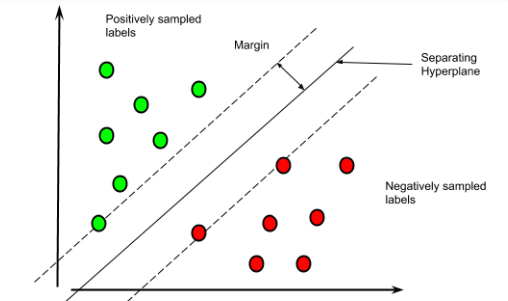

The hyperplane can be expressed as: 
$$H = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p = \beta^t x = 0 $$
The vector $\beta$ is the normal vector to H. 

Once we have found the hyperplane we can perform classification by using the hyperplane equation. Infact if the hyperplane found is correct, then we can assign to a point in the feature space a label, based upon its position wrt the hyperplane itself. 
So what we'll do is:
$$\beta^t x = \begin{cases}
        > 0 & \text{if } y = 1\\
        < 0 & \text{if } y = -1\\
        = 0 & \text{if } x \in H 
    \end{cases}$$

Infact what we're doing there is a projection onto the direction of $\beta$ of the feature vector x. This corresponds to finding the perpendicular distance from H of x. The key idea is that the more distant a point is from the boundary H, the more confident we are in its classification. 

Strictly speaking, finding H corresponds to solving the following coinstrained optimization problem: 
$$\begin{aligned}
&\max_{\beta}{M} \\
&y_i (\beta^t x_i) > M \space \forall i = 1,...,n\\
&|\beta|_2^2 = 1
\end{aligned}$$
where M is the margin you can see in the figure above. 

Translating the math, what we are looking for is an hyperplane (defined by its normal vector $\beta$) so that:
1. it is the hyperplane that divides the points in two classes, corresponding to their label.
2. every point is at least at a distance M from the hyperplane.
3. The model properly labels the data. When y = -1, then $\beta^t x <0$, when y = 1, then $\beta^t x >0$. This condition directly addresses the classification based upon position wrt to the hyperplane.  

Note that the parameters of this model (MMC) are p and correspond exactly to the coordinates of the hyperplane normal vector. Another important thing is that the hyperplane we find depends only from the points at a distance M, while the other ones don't matter. These point in some way hold the hyperplane in place, for this reason they are colled the **support vectors**. 

This approach can work **only** when an hyperplane with these properties can be found. Infact when the data cannot be divided linearly, a solution for the problem cannot be found. 

The MMC is the starting algorithm. SVM work following the same idea, but permit to find non-linear classification boundaries. The MMC is also called *large margin* classification. Infact the points are not allowed to be less distant than M from the hyperplane. If this condition cannot be satisfied, then an hyperplane cannot be found and the method won't work. 

#### Support Vector Classifier (Soft Margin Classifier) 
The support vector classifier works exactly like the MMC, but it relaxes some constraints. Specifically it allows some points to violate the distance constraint, so that we can find an hyperplane that allows some classification errors. 

The mathematical form of the problem is the following: 
$$\begin{aligned}
&\max_{\beta}{M} \\
&y_i (\beta^t x_i) > M(1 - \epsilon_i) \space \forall i = 1,...,n\\
&|\beta|_2^2 = 1 \\
& \sum_{i=0}^{n} \epsilon_i \leq C \\
& \forall i = 1,...,n; \space \epsilon_i \geq 0
\end{aligned}$$

In this case we allow less than C points to violate the distance costraint. C is an hyperparameter of the model and the larger it is the more forgiving our constraint becomes. Specifically it is the margin of error we allow our model to make. 

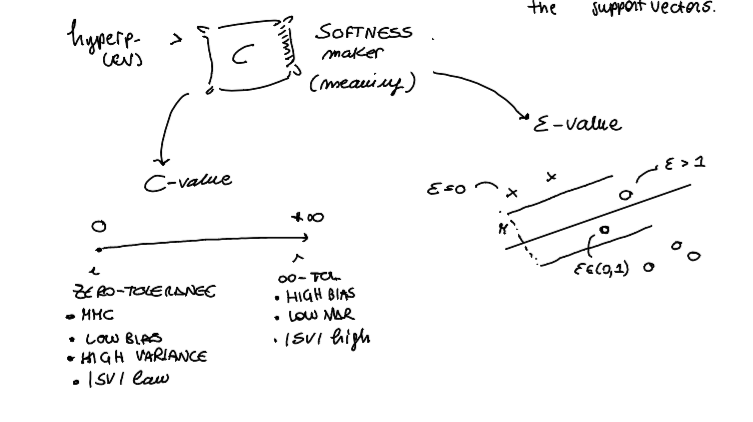

Anyway the classifation works exactly like before, by considering the point position wrt the border:
$$\beta^t x = \begin{cases}
        > 0 & \text{if } y = 1\\
        < 0 & \text{if } y = -1\\
        = 0 & \text{if } x \in H 
    \end{cases}$$

Like before we have that even the SVC can only find a linear border between variables. For finding non-linear classification borders we will have to change approach. The points within a distance M from the border are called **support vectors**: the hyperplane found depends only upon them, these points hold the border. 

#### Support Vector Machines
SVM work exactly like the SVC, except that the hyperplane is found within an augmented feature space. the key idea here is solving the same optimization problem but in an higher-dimensional space. How can we do that?

The cross-product, that before was a way of finding the perpendicular distance of a point from the hyperplane, can also be thought as a measure of similarity between point. The optimization problem w esaw before can be refactored in a way that the classification function can be shown to be: 
$$f(x)=\beta_0 + \sum_{i=0}^n \alpha_i \cdot x \cdot x_i$$

We use this exactly like we did before with the hyperplane equation, by looking at the sign of $f(x)$. So we have that: 
$$f(x) = \begin{cases}
        > 0 & \text{if } y = 1\\
        < 0 & \text{if } y = -1\\
        = 0 & \text{if } x \in H 
    \end{cases}$$

It can also be shown that the only $\alpha_i$ to be non-null are the ones related to the support vectors of the hyperplane. 

Coming to the SVM, what we do is considering special functions in place of the dot product in the classification function. These functions are called kernels and they have regularity properties such that they satisfy the **Mercier's theorem**. 

What we do is solving exactly the same optimization problem, but in a higher  dimensional feature space. There we deal with: $$\phi(a)^t\phi(b)$$ considering this dot product as similarity measure between vectors. Solving the problem we will find an hyperplane in the augmented space. Then what we project the solution hyperplane in the starting feature space. 

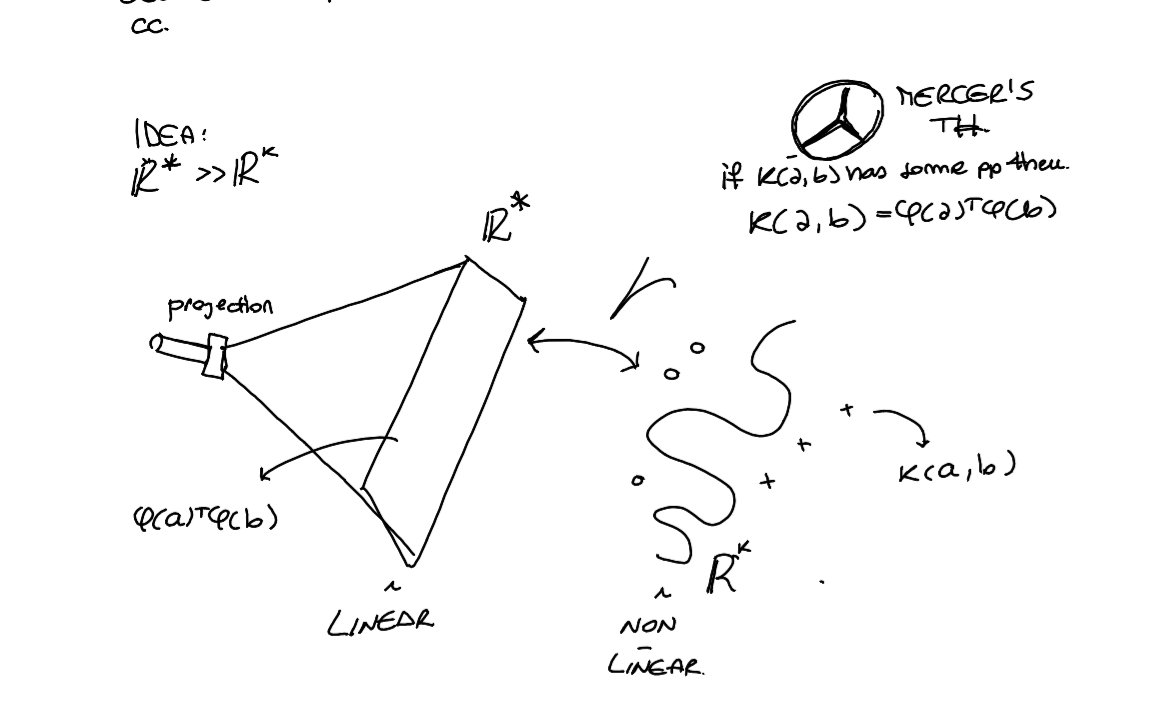

This projection allow to find a non-linear classifier border, born from an hyperplane of higher dimension. 

The miracle here is done by Mercier's theorem and the chosen kernel function. This says that, if the kernel function satisfies some regularity properties:
$$\exist \phi : \phi(a)^t\phi(b) = K(a,b)$$
This is to say that we can solve the higher dimensional optimization problem, even without knowing the $\phi$ function, but just by apllying the kernel function to the data. This is known as the kernel trick, and it is the theoretical magic behind the cap of SVM.

Choosing the right kernel depends upon the problem we are facing. From a theoretical point of view this doesn't change nothing.


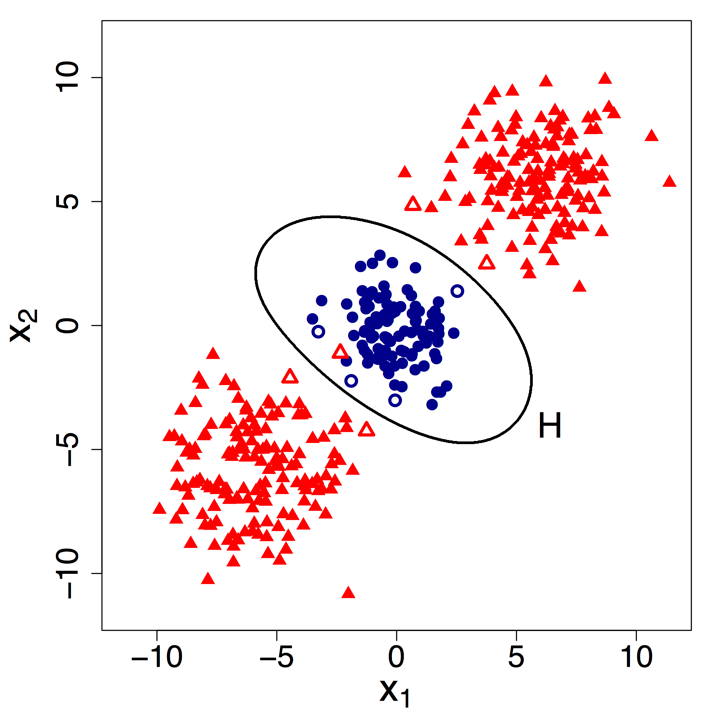 


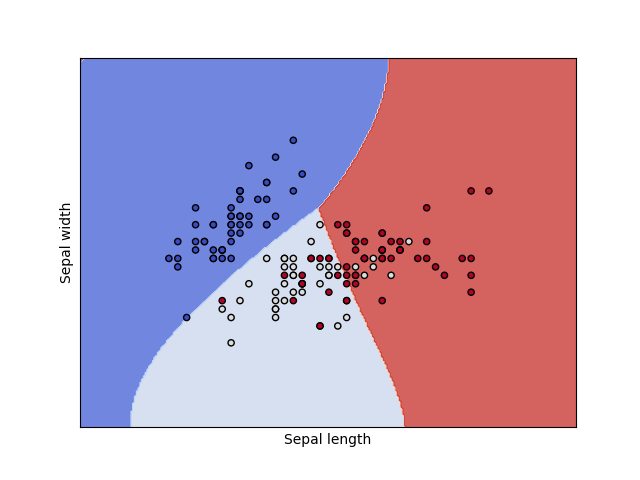

#### Kernel Regression 
Before our goal was finding the best hyperplane to divide our data. In kernel regression we want to find the best hyperplane that does exactly the contrary. That is: we want to find the plane that best fits the data. This means that we want to find an hyperplane so that almost all the points are to be found **within** a distance M (the margin) from the plane and only some of them will lie outside of this threshod. 

From a mathematical perspective what we have done is reversing the optimization problem. Then the rest works the same. Kernel regression works in both linear and non-linear regression scenarios. 

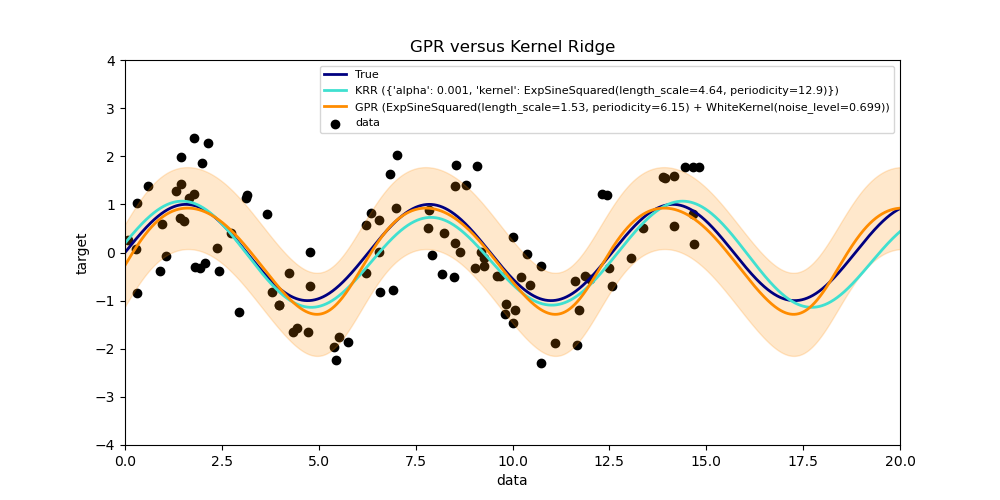

## Practice
The theory from above is an hands-on overview inspired by the *An introduction to statistical learning* book. In SciKitLearn the SVM hypreparameter C, has the exact opposite interpretation. That is:

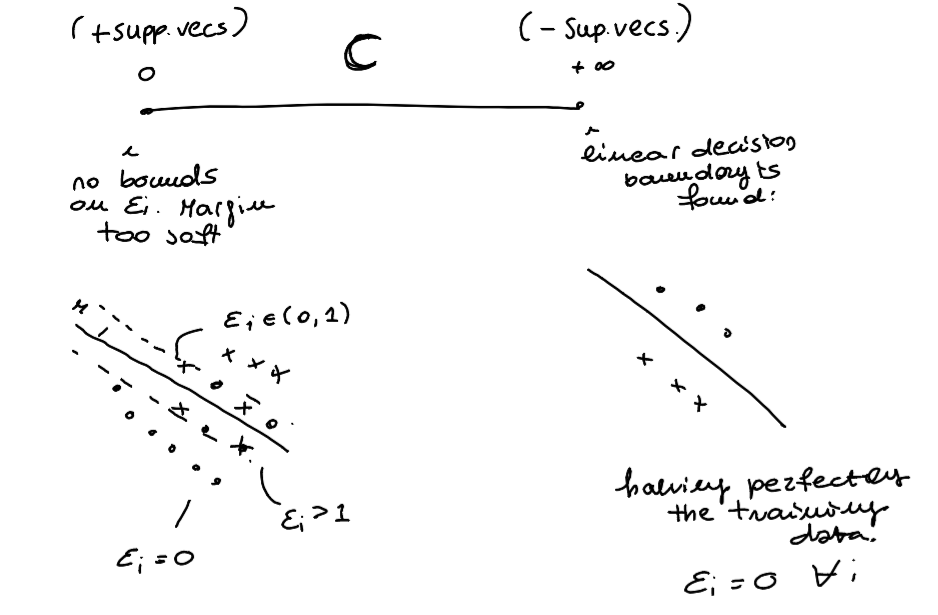

With a low value we obtain a model with a lot of margin violations, but that in some cases may generalize better. In general  smaller number of margin violations is better. So if the model is overfitting, you can try to lower the value of C. This will allow more margin violation, inreasing the model bias but lowering its variance. This is due to the fact that allowing more margin violations also means that we have a greater nmber of support vectors. This has the consequence that the hyperplane we find depends upon more values as C gets lower, thus decreasing the model variance. 

The reason for this is in how the optimization problem is considered. In the end both the approaches lead to the same result. 

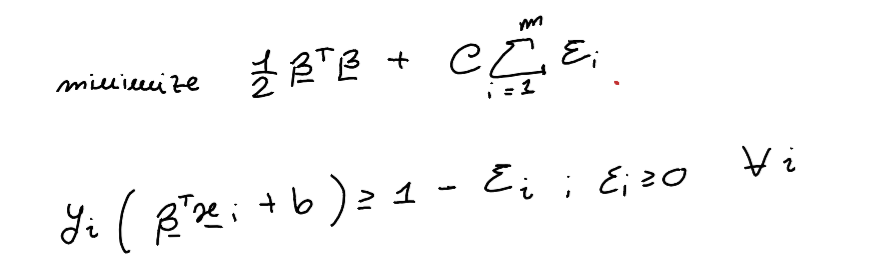

#### Support Vector Classifier (Soft Margin Classification)
A must-go is feature scaling before training the model. This will improve model's performance and lower training time. 

In [4]:
from sklearn import datasets
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

# set the loss equal to hinge and also be sure to normalize the data. 
# Also, for performance, be sure to set: dual="False"

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])
# prediction: class 1

array([1.])

The hinge loss is the function:
$$l(x) = \max(0,1-y\cdot (\beta^tx+b))$$
and its graph is:

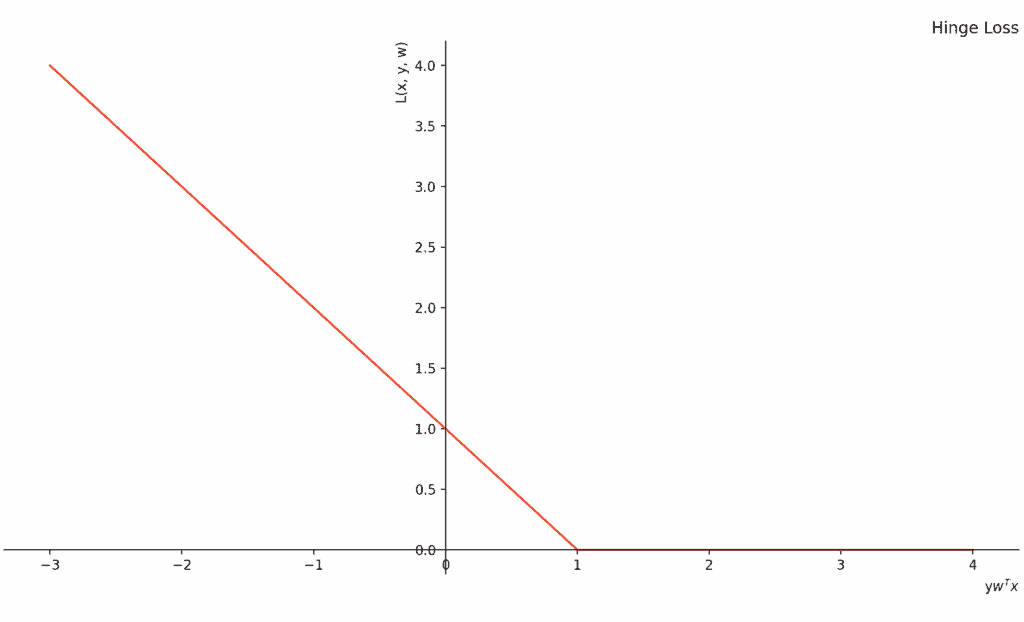

Where y is the intended output of the model ($y = \pm 1$), $y\cdot (\beta^tx+b)$ is the classification score.The point score must satisfie the margin condition: 
$$y(\beta^tx+b) \geq 1 - \epsilon_i$$
So the hinge loss depends upon the value of $\epsilon_i$. That value is related to the model working properly or not. 

If $\epsilon_i$ is null, then the point is correctly classified. 
If $\epsilon_i$ is less than 1 and more than 0, the point is within margin distance from the border
If $\epsilon_i$ is more than 1, then the point is uncorrectly labeled by the model. 

If $\epsilon_i$ is null, then $y\cdot (\beta^tx+b)$ will be positive and more than one. The loss is zero. 
If $\epsilon_i$ is less than 1 and more than 0, then $y\cdot (\beta^tx+b)$ is positive but not large, so we have a positive loss term.
If $\epsilon_i$ is more than 1, then $y\cdot (\beta^tx+b)$ is negative and the loss function assumes its peak value.

In a few words, the hinge loss function is used with svm, since it can be directly linked to the model performance.

#### Nonlinear SVM classification
For handling this cases we can try to add features.

##### Polynomial Kernel
Consider powers of the same feature. This will allow to find a non-linear classification boder in the feature space. 

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise = 0.15)
polynomial_svm_classifier = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_classifier.fit(X, y)

c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

For computational purposes, we can try to implement the Kernel trick. This will allow to find the best boundary considering an higher dimensional feature space, but working with data of the original feature space and the kernel function. This is an huge saving in computational power, without losing the optimal result, exploiting the same the higher dimensional feature space. 

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict(X)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

If the model is overfitting: lower the kernel polynomial degree.
If the model is underfitting: increase the kernel polynomial degree. 
The value *coef0* controls how much the model is sensible to high-degree pol versus low-degree pol.

A common approach at finding the best hyperparameters for the model is *Grid Search*

##### Gaussian RBF Kernel
We consider a modified higher-dimensional feature space. That is computed by considering the following transformation on each datapoint: 
$$\phi_\gamma(x,l_i) = \exp{(-\gamma ||x-l||^2)} \forall i = 1,...,m$$
where l is a so-called landmark. Taking m landmark means that for every instance in the dataset a new set of m features is computed. The more landmark you consider, the higher-dimensional the modified feature space will be, thus improving the probability of it being linearly saparable. 

The value of gamma ($\gamma$) and C can be cnsidered as regularization hyperparameters. If the model is overfitting lower them, if it is underfitting you should increase them. 

We will again perform the kernel trick, using a Gaussian RBF kernel.

In [9]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

##### Choosing the Kernel
As a rule of thumb:
1. First try the linear kernel, since it computationally efficient.
2. Try the Guassian RBF Kernel if the training set is not too large.
3. In the spare time and with a lot of computational power, try other kernels. 

Use cross-validation and grid-search (for both chossing the best kernela and tuning its hyperparameters).

#### SVM regression
Wors like before but now we search the best hyperplane that has as much point as possible within a margin distance M. in SVM regression we solve the same opimal problem, but with the reversed goal funcion. 

In [ ]:
from sklearn.svm import LinearSVC

svm_reg = LinearSVC(epsilon=1.5)
svm_reg.fit(X, y)

The hyperparameter $\epsilon$ is related to the margin width. The higher its value, the larger the margin. The lower the $\epsilon$, the narrower the margin. If we want to perform non-linear regression we can try using a polynomial kernel. 

In [10]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')